In [1]:
import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

# Design filter with iirdesign() function

**You know what the filter needs to do but you don't have preferences on its contruction.**

In [2]:
help(signal.iirdesign)

Help on function iirdesign in module scipy.signal._filter_design:

iirdesign(wp, ws, gpass, gstop, analog=False, ftype='ellip', output='ba', fs=None)
    Complete IIR digital and analog filter design.
    
    Given passband and stopband frequencies and gains, construct an analog or
    digital IIR filter of minimum order for a given basic type. Return the
    output in numerator, denominator ('ba'), pole-zero ('zpk') or second order
    sections ('sos') form.
    
    Parameters
    ----------
    wp, ws : float or array like, shape (2,)
        Passband and stopband edge frequencies. Possible values are scalars
        (for lowpass and highpass filters) or ranges (for bandpass and bandstop
        filters).
        For digital filters, these are in the same units as `fs`. By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency. For example:
    
            - Lowpass:   wp = 0.2,          ws = 0.3
            - H

In [3]:
z, p, k = signal.iirdesign(wp=1e3, ws=1.2e3, gpass=3, gstop=40, analog=True, ftype='ellip', output='zpk')

In [4]:
print('Zeroes:')
for i in z:
    print(i)

print('Poles:')
for i in p:
    print(i)
    
print('Gain: ', k)

Zeroes:
1581.465404445461j
1166.3188729515323j
-1581.465404445461j
-1166.3188729515323j
Poles:
(-251.27719792279007+0j)
(-131.68161109704184-741.9452282372067j)
(-26.4307631018414-985.6838416368644j)
(-131.68161109704184+741.9452282372067j)
(-26.4307631018414+985.6838416368644j)
Gain:  40.77550193238921


In [5]:
w, h = signal.freqs_zpk(z, p, k)

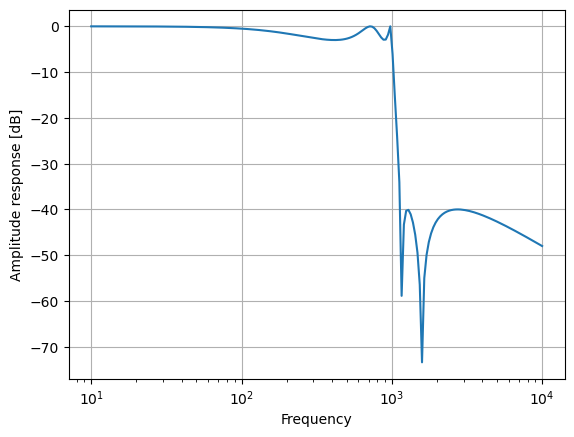

In [6]:
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid()
plt.show()

# Design filter with iirfilter() function

**You know exaclty which parameters your filter needs to have.**

In [7]:
help(signal.iirfilter)

Help on function iirfilter in module scipy.signal._filter_design:

iirfilter(N, Wn, rp=None, rs=None, btype='band', analog=False, ftype='butter', output='ba', fs=None)
    IIR digital and analog filter design given order and critical points.
    
    Design an Nth-order digital or analog filter and return the filter
    coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        A scalar or length-2 sequence giving the critical frequencies.
    
        For digital filters, `Wn` are in the same units as `fs`. By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency. (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angular frequency (e.g., rad/s).
    
        When Wn is a length-2 sequence, ``Wn[0]`` must be less than ``Wn[1]``.
    rp : float, optional
        For Chebyshev and elliptic filters, provides the max

In [8]:
z2, p2, k2 = signal.iirfilter(N=5, Wn=[1e3], rp=3, rs=40, btype='lowpass', analog=True, ftype='ellip', output='zpk')

In [9]:
print('Zeroes:')
for i in z2:
    print(i)

print('Poles:')
for i in p2:
    print(i)
    
print('Gain: ', k)

Zeroes:
1581.465404445461j
1166.3188729515323j
-1581.465404445461j
-1166.3188729515323j
Poles:
(-251.27719792279007+0j)
(-131.68161109704184-741.9452282372067j)
(-26.4307631018414-985.6838416368644j)
(-131.68161109704184+741.9452282372067j)
(-26.4307631018414+985.6838416368644j)
Gain:  40.77550193238921


**Note that the result is exactly te same as for the iirdesign.**

In [10]:
w2, h2 = signal.freqs_zpk(z2, p2, k2)

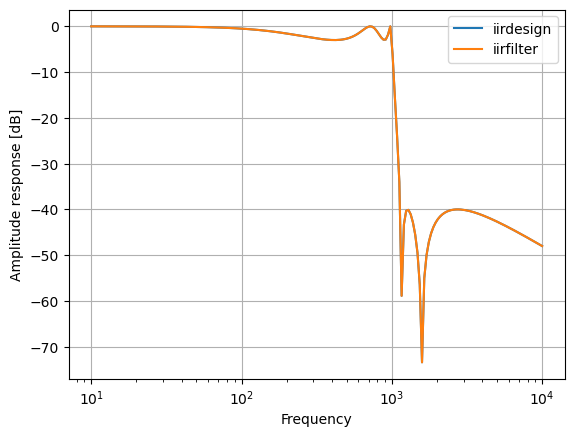

In [11]:
plt.semilogx(w, 20 * np.log10(abs(h)), label='iirdesign')
plt.semilogx(w2, 20 * np.log10(abs(h2)), label='iirfilter')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid()
plt.show()

# Use iirdesign() function and check the relation of the filter order to the requirements you set

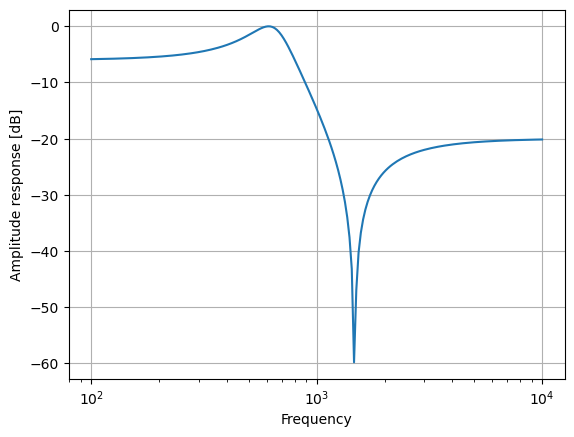

Zeroes:
1471.0835537373014j
-1471.0835537373014j
Poles:
(-138.52376969638217-642.3420066211439j)
(-138.52376969638217+642.3420066211439j)
Gain:  0.10000000000000003


In [33]:
z3, p3, k3 = signal.iirdesign(wp=0.8e3, ws=1.2e3, gpass=6, gstop=20, analog=True, ftype='ellip', output='zpk')

w, h = signal.freqs_zpk(z3, p3, k3)

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid()
plt.show()

print('Zeroes:')
for i in z3:
    print(i)

print('Poles:')
for i in p3:
    print(i)
    
print('Gain: ', k3)

# Apply the filter to some data

Watch out that the filter we designed is analogue. sosfilt() function we will use performs digital filtering. Use bilinear_zpk() transformation to obatin the right digital coefficients from their analogue form.

In [41]:
data = np.random.random(4096)*0.1

z3, p3, k3 = signal.bilinear_zpk(z3, p3, k3, 1e3)

sos = signal.zpk2sos(z3, p3, k3, analog=True)

zi = signal.sosfilt_zi(sos)

filt_data, zi = signal.sosfilt(sos, data, zi=zi)

In [42]:
print(filt_data.size)

4096


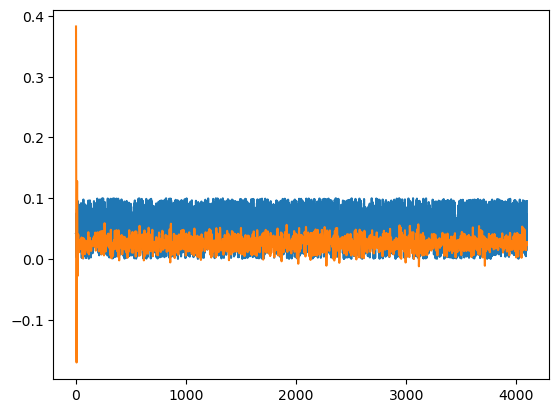

In [43]:
plt.plot(data)
plt.plot(filt_data)

# Check if the filter did it right

(array([5.41742149e-02, 2.74122438e-02, 2.92579097e-04, 2.20788386e-04,
        2.67210940e-04, 2.29914215e-04, 1.80602623e-04, 2.11027122e-04,
        1.86098662e-04, 1.41008656e-04, 3.13876628e-04, 4.04208317e-04,
        3.19932337e-04, 2.93827331e-04, 3.44131914e-04, 2.55586212e-04,
        4.03728202e-04, 4.93422748e-04, 4.58513128e-04, 3.66459494e-04,
        4.79424365e-04, 5.78476116e-04, 6.19872779e-04, 6.88744244e-04,
        6.94998348e-04, 1.11765941e-03, 8.58221650e-04, 6.10654735e-04,
        6.55273727e-04, 4.71278822e-04, 2.29895497e-04, 1.61541778e-04,
        1.44006210e-04, 1.15806097e-04, 4.42189870e-05, 3.26478439e-05,
        3.65486104e-05, 3.45984544e-05, 2.70114957e-05, 1.64096913e-05,
        7.32081167e-06, 1.10297053e-05, 1.21501428e-05, 9.27932399e-06,
        6.48416723e-06, 3.71273549e-06, 1.15748941e-06, 1.23403662e-06,
        5.89357759e-07, 3.07102803e-07, 1.34144513e-07, 2.87472556e-08,
        1.46712436e-08, 5.96098814e-08, 1.28687212e-07, 2.474113

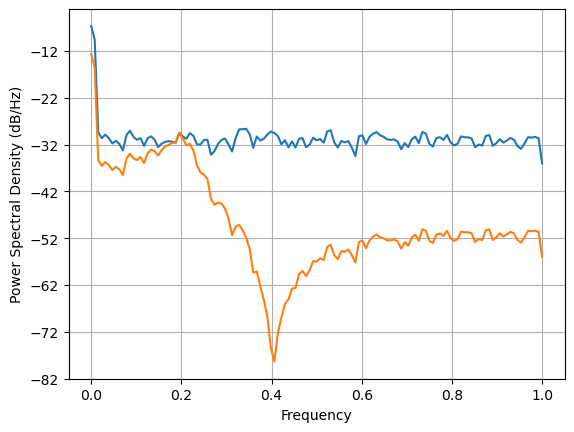

In [50]:
plt.psd(data)
plt.psd(filt_data)